# 2021/12/10
# 本代码绘制插值后的海温图
# 用作论文中替换海洋格点的示意图

In [1]:
import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

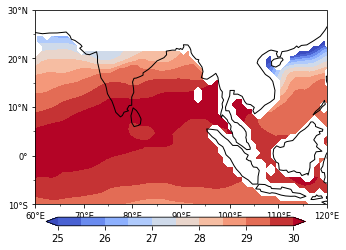

In [2]:
# 这里把四月的海温提取出来
april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)

sst  =  np.average(f.SST_cpl,axis=0)

lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)

# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))

for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
    
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
    
lsm2[90:112,70:90] = 0


sst[lsm2 >0.1]  =  np.nan


props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
#ax.add_feature(cart.feature.LAND, zorder=0)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(25,30,11), cmap='coolwarm',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

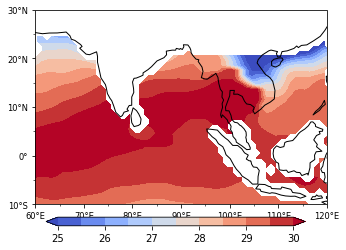

In [3]:
# 这里把四月的海温提取出来
april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)

sst  =  np.average(f.SST_cpl,axis=0)

lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)

# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))

for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
    
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
    
lsm2[97:111,90:120] = 0



sst[lsm2 >0.1]  =  np.nan


props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
#ax.add_feature(cart.feature.LAND, zorder=0)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(25,30,11), cmap='coolwarm',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

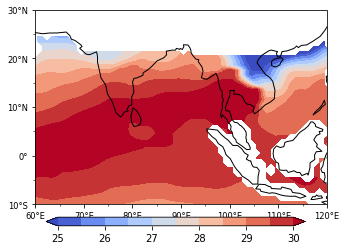

In [4]:
# 这里把四月的海温提取出来
april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)

sst  =  np.average(f.SST_cpl,axis=0)

lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)

# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))

for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
    
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
    
lsm2[97:111,90:120] = 0
lsm2[90:112,70:90] = 0


sst[lsm2 >0.1]  =  np.nan


props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
#ax.add_feature(cart.feature.LAND, zorder=0)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(25,30,11), cmap='coolwarm',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

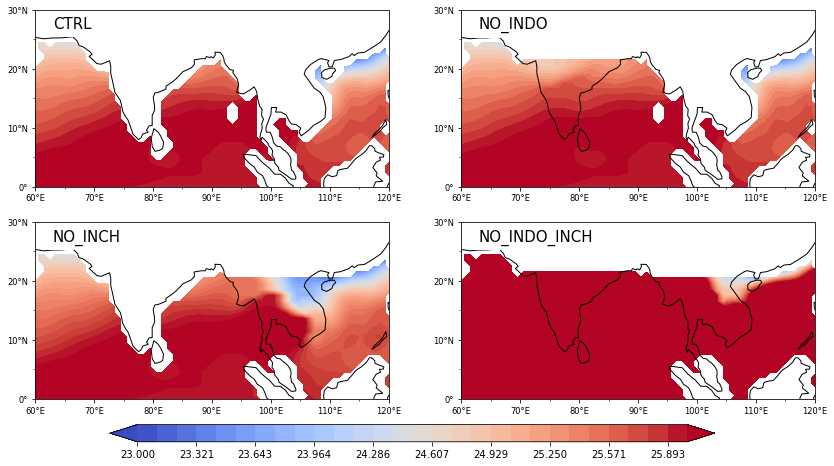

In [9]:
# 设置范围
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]

# 文本框设置
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

# 处理control实验

april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)
sst  =  np.average(f.SST_cpl,axis=0)
lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)
# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))

for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
    
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
sst[lsm2 >0.1]  =  np.nan

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(14,8))

ax  =  fig1.add_subplot(2,2,1,projection=proj)
ax.coastlines(resolution='110m',lw=1)
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(23,30,29), cmap='coolwarm',alpha=1,extend='both')
ax.text(0.05,0.895,"CTRL",transform=ax.transAxes,bbox=props,fontsize=15)

# 处理NO_INDO

april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)
sst  =  np.average(f.SST_cpl,axis=0)
lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)
# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))
for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
lsm2[90:112,70:90] = 0
sst[lsm2 >0.1]  =  np.nan

ax  =  fig1.add_subplot(2,2,2,projection=proj)
ax.coastlines(resolution='110m',lw=1)
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(23,30,29), cmap='coolwarm',alpha=1,extend='both')
ax.text(0.05,0.895,"NO_INDO",transform=ax.transAxes,bbox=props,fontsize=15)

# 处理NO_INCH
april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)
sst  =  np.average(f.SST_cpl,axis=0)
lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)
# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))
for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
lsm2[97:111,90:120] = 0
sst[lsm2 >0.1]  =  np.nan

ax  =  fig1.add_subplot(2,2,3,projection=proj)
ax.coastlines(resolution='110m',lw=1)
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(23,30,40), cmap='coolwarm',alpha=1,extend='both')
ax.text(0.05,0.895,"NO_INCH",transform=ax.transAxes,bbox=props,fontsize=15)

# 处理NO_INCH_indo
april  =  [x*12+3 for x in range(140,160)]
f  =  xr.open_dataset("/home/sun/data/sst_HadOIBl_bc_1x1_1850_2017_c180507.nc").isel(time=april)
sst  =  np.average(f.SST_cpl,axis=0)
lsm  =  xr.open_dataset("/home/sun/data/erain_land_sea_mask.nc")
lsm  =  lsm.sortby(lsm.latitude)
# 现在将lsm插值到海温的格点上
lsm1  =  np.zeros((lsm.latitude.shape[0],f.lon.shape[0]))
lsm2  =  np.zeros((f.lat.shape[0],f.lon.shape[0]))
for i in range(0,lsm.latitude.shape[0]):
    lsm1[i,:]  =  np.interp(f.lon.data,lsm.longitude.data,lsm.lsm.data[0,i,:])
for j in range(0,f.lon.shape[0]):
    lsm2[:,j]  =  np.interp(f.lat.data,lsm.latitude.data,lsm.lsm.data[0,:,j])
lsm2[97:111,90:120] = 0
lsm2[90:112,70:90] = 0
sst[lsm2 >0.1]  =  np.nan

ax  =  fig1.add_subplot(2,2,4,projection=proj)
ax.coastlines(resolution='110m',lw=1)
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,sst,levels=np.linspace(23,26,29), cmap='coolwarm',alpha=1,extend='both')
ax.text(0.05,0.895,"NO_INDO_INCH",transform=ax.transAxes,bbox=props,fontsize=15)

fig1.subplots_adjust(top=0.8) #整体往上紧凑来给下面的colorbar增加空间

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])  #依次是左端 下端 宽度 高度
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal') #这样画就可以了


plt.savefig('/home/sun/paint/lunwen/lunwen_version3.0_fig9_interpolated_sst.pdf', bbox_inches='tight',dpi=1200)
plt.show()